In [1]:
import pandas as pd
import numpy as np
from utils.utils import load_all_games_csv, get_teams
from matplotlib import pyplot as plt


# Rest Days Analysis
This notebook will examine the relationship between rest days and the probability of a given team winning.

## Get all Games

In [2]:
all_games = load_all_games_csv('../data/gameinfo_cleaned.csv')

/Users/lancehendricks/Documents/College Coding/ML/Elo Ratings/src/utils/utils.py:18: DtypeWarning: Columns (10,11,13,17,19,21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  all_games = pd.read_csv(filename)


## Win % vs Rest days

In [3]:
# Get rest day groupings - home
home_rest_days = all_games.groupby(by='homerestdays').agg({'homewon':'sum', 'hometeam':'count'}).rename(columns={'homewon':'Wins', 'hometeam':'Games'})
home_rest_days.index = home_rest_days.index.rename('Rest Days')

# Get rest day groupings - away
away_rest_days = all_games.groupby(by='visrestdays').agg({'homewon':lambda x:(1-x).sum(), 'hometeam':'count'}).rename(columns={'homewon':'AwayWins', 'hometeam':'AwayGames'})
away_rest_days.index = away_rest_days.index.rename('Rest Days')

rest_days = home_rest_days.join(away_rest_days, how='outer')
rest_days['Wins'] = rest_days['Wins'].fillna(0) + rest_days['AwayWins'].fillna(0)
rest_days['Games'] = rest_days['Games'].fillna(0) + rest_days['AwayGames'].fillna(0)

rest_days = rest_days.drop(['AwayWins', 'AwayGames'], axis=1)
rest_days['Win %'] = rest_days['Wins'] / rest_days['Games']
rest_days.head()

,Wins,Games,Win %
Rest Days,,,
0,17224.0,34443.0,0.500073
1,164996.0,330074.0,0.499876
2,28069.0,55989.0,0.501331
3,3849.0,7705.0,0.499546
4,1720.0,3476.0,0.494822


Text(0.5, 1.0, 'Win % vs Rest Days')

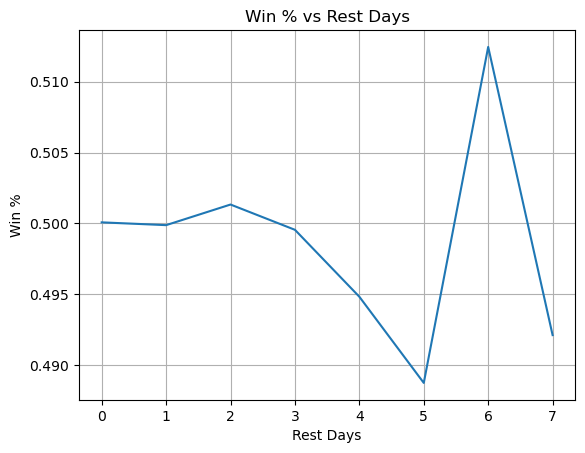

In [4]:
# Only look at a week
rest_days = rest_days.loc[:7]

plt.plot(rest_days.index, rest_days['Win %'])
plt.grid()
plt.xlabel("Rest Days")
plt.ylabel("Win %")
plt.title("Win % vs Rest Days")